In [3]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report

/usr/local/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
df=pd.read_csv('diabetes.csv')
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df.describe().round(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [8]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
df.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [10]:
df.Outcome.value_counts(1)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [11]:
X=df.drop(['Outcome'],axis=1)
y=df['Outcome']

In [12]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [13]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=123)

In [15]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
(614,)
(154,)


In [16]:
from sklearn.tree import DecisionTreeClassifier
dectr=DecisionTreeClassifier()
dectr.fit(x_train,y_train)

DecisionTreeClassifier()

In [17]:
#Prediction on test data
predict_test=dectr.predict(x_test)
print(predict_test)

#Confusion Matrix
print(confusion_matrix(y_test,predict_test))
#Classification report
print(classification_report(y_test,predict_test))

[1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 0
 1 0 0 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0
 0 1 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 1 0 1 0 1 0]
[[71 25]
 [11 47]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80        96
           1       0.65      0.81      0.72        58

    accuracy                           0.77       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.79      0.77      0.77       154



In [18]:
#Prediction on train data
predict_train=dectr.predict(x_train)
print(predict_train)

#Confusion Matrix
print(confusion_matrix(y_train,predict_train))
#Classification report
print(classification_report(y_train,predict_train))

[0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0
 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 0 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1
 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 1 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0
 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0
 1 0 0 1 1 0 0 0 1 1 1 0 

[Text(179.42557228915663, 210.645, 'X[1] <= 143.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(73.2627108433735, 197.055, 'X[5] <= 26.95\ngini = 0.36\nsamples = 471\nvalue = [360, 111]'),
 Text(22.588915662650603, 183.465, 'X[5] <= 26.35\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(14.52144578313253, 169.875, 'X[7] <= 59.0\ngini = 0.034\nsamples = 115\nvalue = [113, 2]'),
 Text(8.067469879518072, 156.285, 'X[6] <= 0.675\ngini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(4.840481927710844, 142.695, 'gini = 0.0\nsamples = 91\nvalue = [91, 0]'),
 Text(11.294457831325301, 142.695, 'X[6] <= 0.688\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(8.067469879518072, 129.10500000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(14.52144578313253, 129.10500000000002, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(20.975421686746987, 156.285, 'X[6] <= 0.343\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(17.74843373493976, 142.695, 'gini = 0.0\nsa

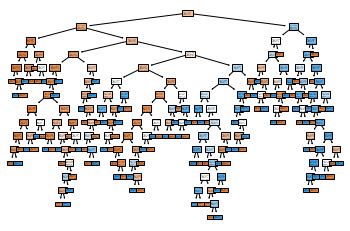

In [19]:
from sklearn import tree
tree.plot_tree(dectr, filled=True)

In [20]:
from sklearn.tree import DecisionTreeClassifier
dectr=DecisionTreeClassifier(max_depth=3)
dectr.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [21]:
#Prediction on test data
predict_test=dectr.predict(x_test)
print(predict_test)

#Confusion Matrix
print(confusion_matrix(y_test,predict_test))
#Classification report
print(classification_report(y_test,predict_test))

[1 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 0 0 0]
[[90  6]
 [33 25]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        96
           1       0.81      0.43      0.56        58

    accuracy                           0.75       154
   macro avg       0.77      0.68      0.69       154
weighted avg       0.76      0.75      0.72       154



In [22]:
#Prediction on train data
predict_train=dectr.predict(x_train)
print(predict_train)

#Confusion Matrix
print(confusion_matrix(y_train,predict_train))
#Classification report
print(classification_report(y_train,predict_train))

[0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1
 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0
 1 0 0 0 1 1 0 0 0 1 0 0 

[Text(167.4, 190.26, 'X[1] <= 143.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(83.7, 135.9, 'X[5] <= 26.95\ngini = 0.36\nsamples = 471\nvalue = [360, 111]'),
 Text(41.85, 81.53999999999999, 'X[5] <= 26.35\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(20.925, 27.180000000000007, 'gini = 0.034\nsamples = 115\nvalue = [113, 2]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(125.55000000000001, 81.53999999999999, 'X[1] <= 107.5\ngini = 0.429\nsamples = 343\nvalue = [236, 107]'),
 Text(104.625, 27.180000000000007, 'gini = 0.278\nsamples = 156\nvalue = [130, 26]'),
 Text(146.475, 27.180000000000007, 'gini = 0.491\nsamples = 187\nvalue = [106, 81]'),
 Text(251.10000000000002, 135.9, 'X[1] <= 154.5\ngini = 0.426\nsamples = 143\nvalue = [44, 99]'),
 Text(209.25, 81.53999999999999, 'X[1] <= 152.5\ngini = 0.5\nsamples = 47\nvalue = [23, 24]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.48\nsamples = 40\nval

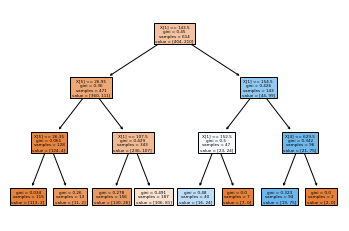

In [23]:
from sklearn import tree
tree.plot_tree(dectr, filled=True)

In [24]:
from sklearn.tree import DecisionTreeClassifier
dectr=DecisionTreeClassifier(max_depth=4)
dectr.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [25]:
#Prediction on test data
predict_test=dectr.predict(x_test)
print(predict_test)

#Confusion Matrix
print(confusion_matrix(y_test,predict_test))
#Classification report
print(classification_report(y_test,predict_test))

[1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1
 0 1 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 0 0]
[[81 15]
 [20 38]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        96
           1       0.72      0.66      0.68        58

    accuracy                           0.77       154
   macro avg       0.76      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



In [26]:
#Prediction on train data
predict_train=dectr.predict(x_train)
print(predict_train)

#Confusion Matrix
print(confusion_matrix(y_train,predict_train))
#Classification report
print(classification_report(y_train,predict_train))

[0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1
 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0
 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 1 0 0 0
 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0
 0 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1
 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 0 0 1 1 0 0 

[Text(194.18400000000003, 195.696, 'X[1] <= 143.5\ngini = 0.45\nsamples = 614\nvalue = [404, 210]'),
 Text(107.13600000000001, 152.208, 'X[5] <= 26.95\ngini = 0.36\nsamples = 471\nvalue = [360, 111]'),
 Text(53.568000000000005, 108.72, 'X[5] <= 26.35\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(26.784000000000002, 65.232, 'X[7] <= 59.0\ngini = 0.034\nsamples = 115\nvalue = [113, 2]'),
 Text(13.392000000000001, 21.744, 'gini = 0.018\nsamples = 109\nvalue = [108, 1]'),
 Text(40.176, 21.744, 'gini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(80.352, 65.232, 'X[3] <= 22.0\ngini = 0.26\nsamples = 13\nvalue = [11, 2]'),
 Text(66.96000000000001, 21.744, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(93.74400000000001, 21.744, 'gini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(160.704, 108.72, 'X[1] <= 107.5\ngini = 0.429\nsamples = 343\nvalue = [236, 107]'),
 Text(133.92000000000002, 65.232, 'X[6] <= 0.657\ngini = 0.278\nsamples = 156\nvalue = [130, 26]'),
 Text(120.528, 21.744,

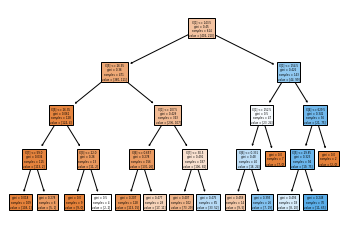

In [27]:
from sklearn import tree
tree.plot_tree(dectr, filled=True)

### Entropy

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',max_depth=3)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [30]:
#Prediction on test data
predict_test=dt.predict(x_test)

#Confusion matrix
print(confusion_matrix(y_test,predict_test))

#Classification Report
print(classification_report(y_test,predict_test))

[[93  3]
 [35 23]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.83        96
           1       0.88      0.40      0.55        58

    accuracy                           0.75       154
   macro avg       0.81      0.68      0.69       154
weighted avg       0.79      0.75      0.72       154



In [34]:
#Prediction on Train Data
predict_train=dt.predict(x_train)

#Confusion Matrix
print(confusion_matrix(y_train,predict_train))
      
#Classification Report
print(classification_report(y_train,predict_train))

[[379  25]
 [123  87]]
              precision    recall  f1-score   support

           0       0.75      0.94      0.84       404
           1       0.78      0.41      0.54       210

    accuracy                           0.76       614
   macro avg       0.77      0.68      0.69       614
weighted avg       0.76      0.76      0.74       614



[Text(2790.0, 1902.6000000000001, 'X[1] <= 143.5\nentropy = 0.927\nsamples = 614\nvalue = [404, 210]'),
 Text(1395.0, 1359.0, 'X[5] <= 26.35\nentropy = 0.788\nsamples = 471\nvalue = [360, 111]'),
 Text(697.5, 815.4000000000001, 'X[7] <= 59.0\nentropy = 0.127\nsamples = 115\nvalue = [113, 2]'),
 Text(348.75, 271.79999999999995, 'entropy = 0.075\nsamples = 109\nvalue = [108, 1]'),
 Text(1046.25, 271.79999999999995, 'entropy = 0.65\nsamples = 6\nvalue = [5, 1]'),
 Text(2092.5, 815.4000000000001, 'X[1] <= 103.5\nentropy = 0.889\nsamples = 356\nvalue = [247, 109]'),
 Text(1743.75, 271.79999999999995, 'entropy = 0.586\nsamples = 135\nvalue = [116, 19]'),
 Text(2441.25, 271.79999999999995, 'entropy = 0.975\nsamples = 221\nvalue = [131, 90]'),
 Text(4185.0, 1359.0, 'X[1] <= 166.5\nentropy = 0.89\nsamples = 143\nvalue = [44, 99]'),
 Text(3487.5, 815.4000000000001, 'X[6] <= 0.331\nentropy = 0.977\nsamples = 85\nvalue = [35, 50]'),
 Text(3138.75, 271.79999999999995, 'entropy = 0.963\nsamples = 31

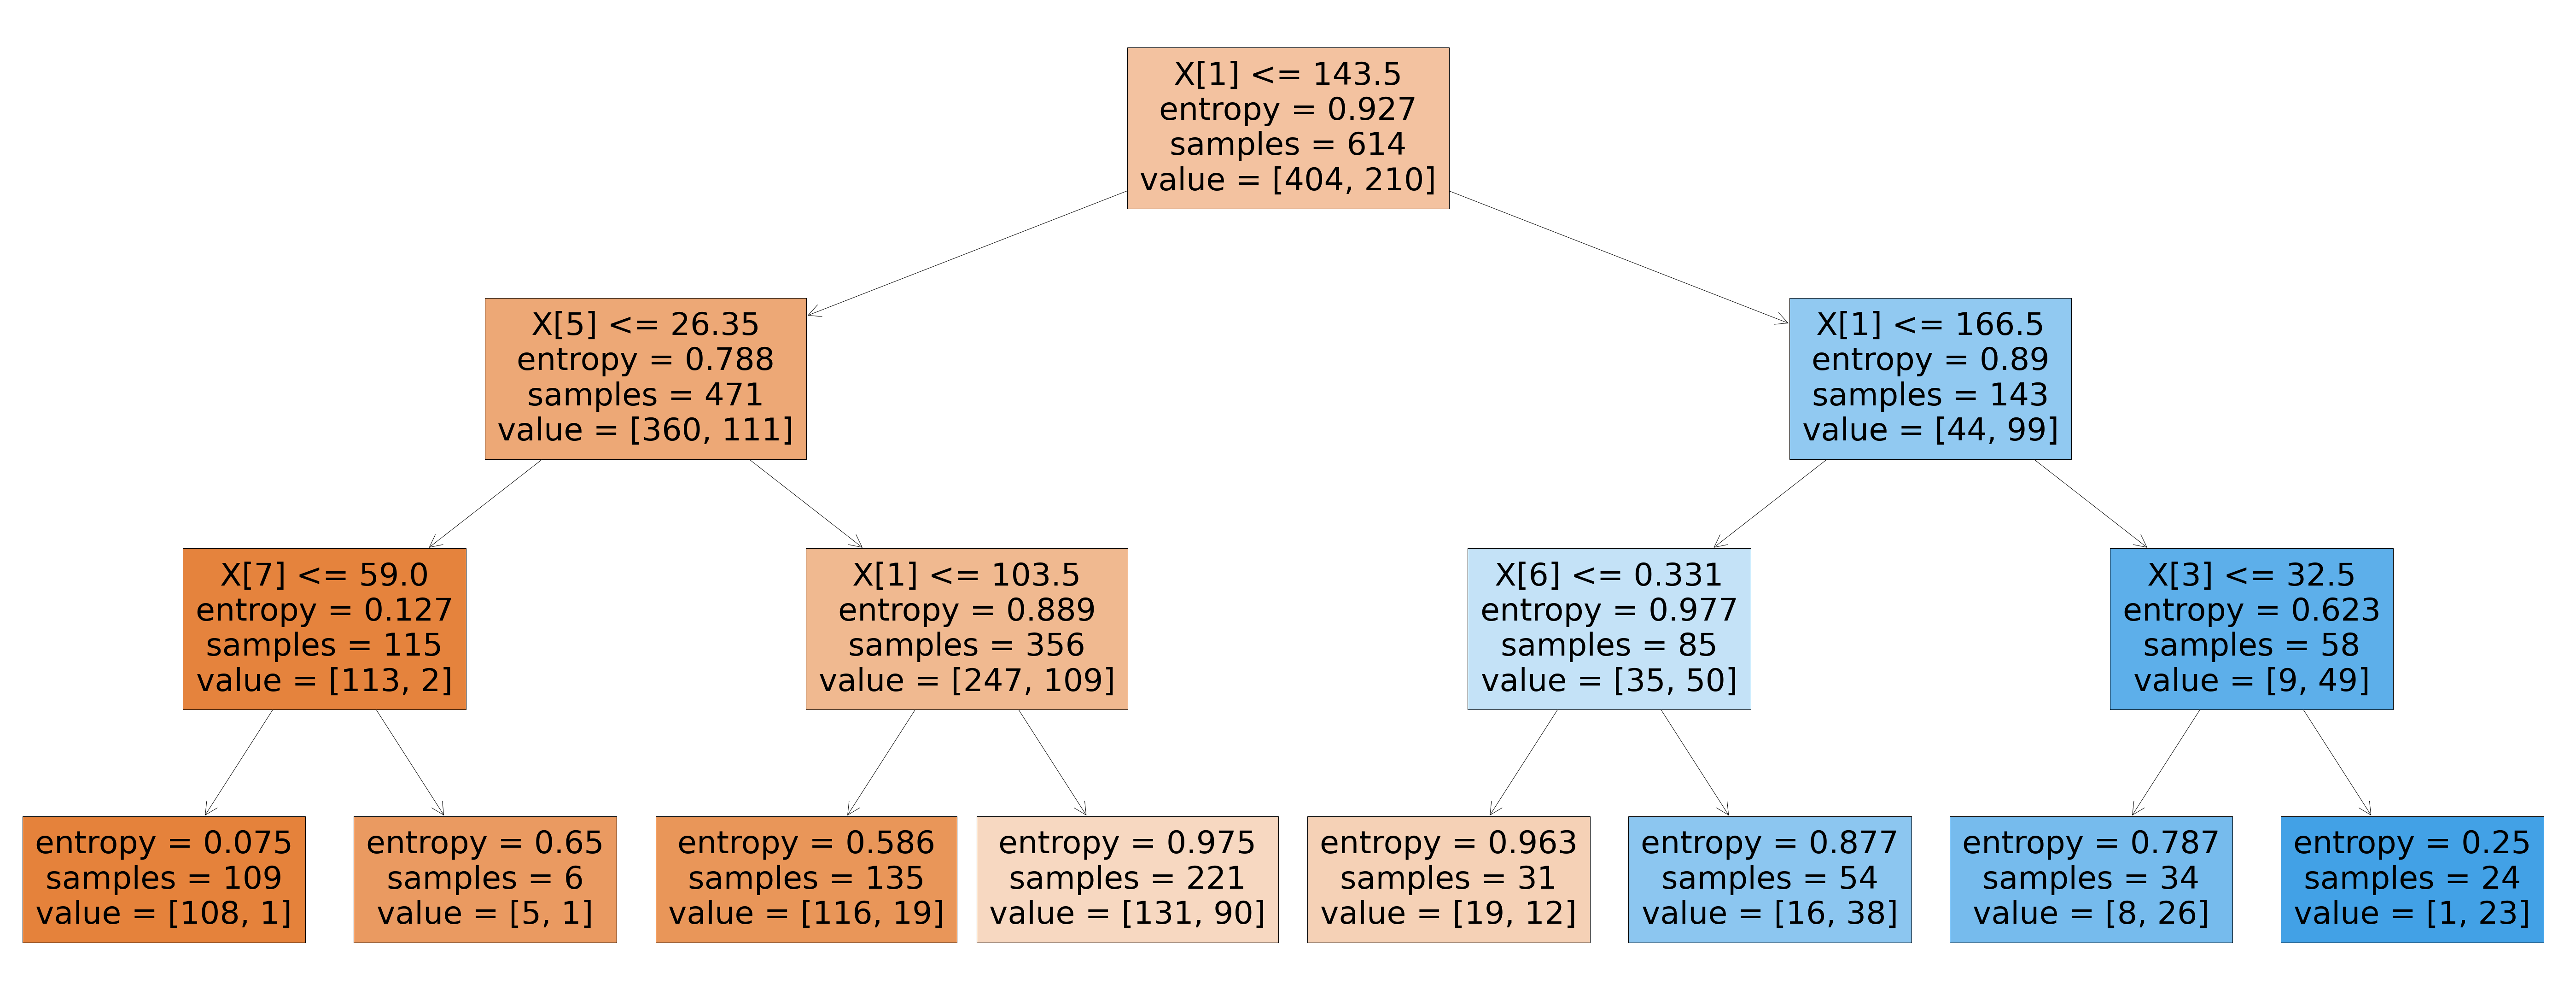

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(100,40))
tree.plot_tree(dt, filled=True)